Step 1: Summary of the Dataset

In [111]:
import pandas as pd
import numpy as np

data=pd.read_csv("tmdb_5000_movies.csv")#loading the data....
df=pd.DataFrame(data)#loading data as a dataframe....
data.shape #for finding number of rows and columns respectively...
data.columns.tolist()#for giving the names of all the columns of the dataset...
data.info()#for basic info...
data.head()#to show first five rows of the data....
data.isnull().sum()# Count of missing values per column
(data.isnull().sum()/len(data))*100
data.duplicated().sum()# Total duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

np.int64(0)

 Step 2: Data Exploration Plan

"""
Step 2: Data Exploration Plan

In this project, I aim to explore the TMDB 5000 Movies dataset to uncover meaningful insights related to movie performance and characteristics. My goals include:

1. Understanding key factors that influence a movie’s success, such as:
   - Budget
   - Runtime
   - Genres
   - Production companies

2. Exploring relationships between features, such as:
   - Does a higher budget result in higher revenue?
   - Does runtime affect user ratings?
   - Are certain genres consistently more popular or higher rated?

3. Identifying trends in release dates, such as:
   - Which years or months see the most successful movie releases?

4. Preparing the data for modeling, including:
   - Cleaning missing or inconsistent data
   - Engineering useful features
   - Creating a model-ready version of the dataset

This exploration will help in building hypotheses and eventually testing them with statistical methods and machine learning if needed.
"""


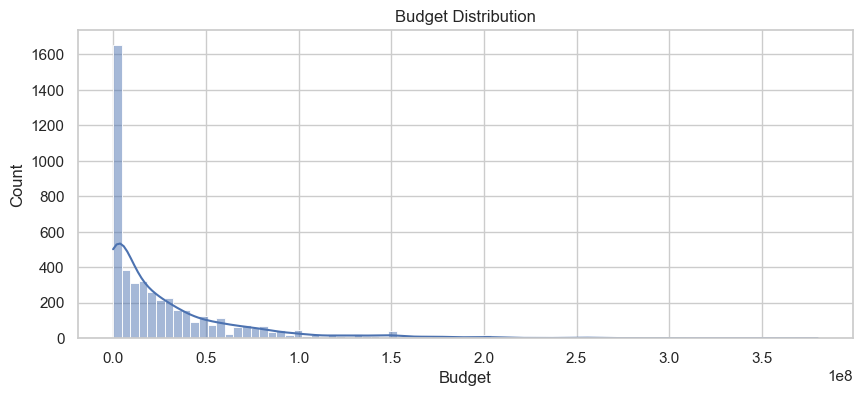

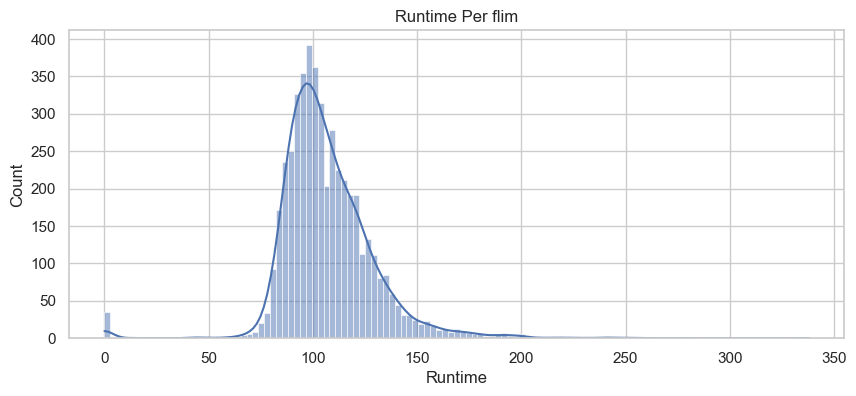

In [112]:
#Checking distribution...
import matplotlib.pyplot as plt
import seaborn as sns


# Set up visual style
sns.set(style="whitegrid")

#plot the graph
plt.figure(figsize=(10,4))
sns.histplot(df['budget'],kde=True)
plt.title("Budget Distribution")
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
sns.histplot(df['runtime'],kde=True)
plt.title('Runtime Per flim')
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.show()

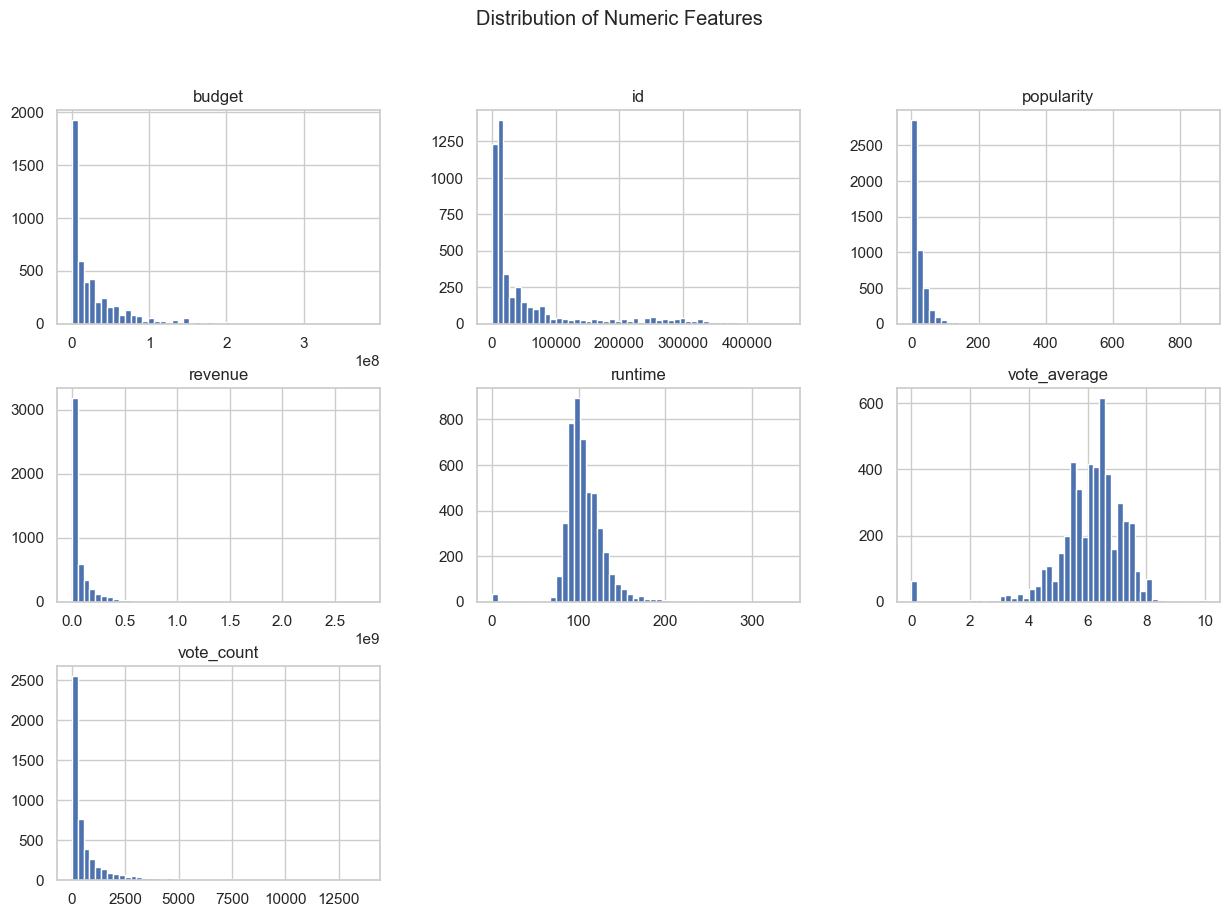

In [113]:
# Histogram for all numeric columns
df.hist(bins=50,figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

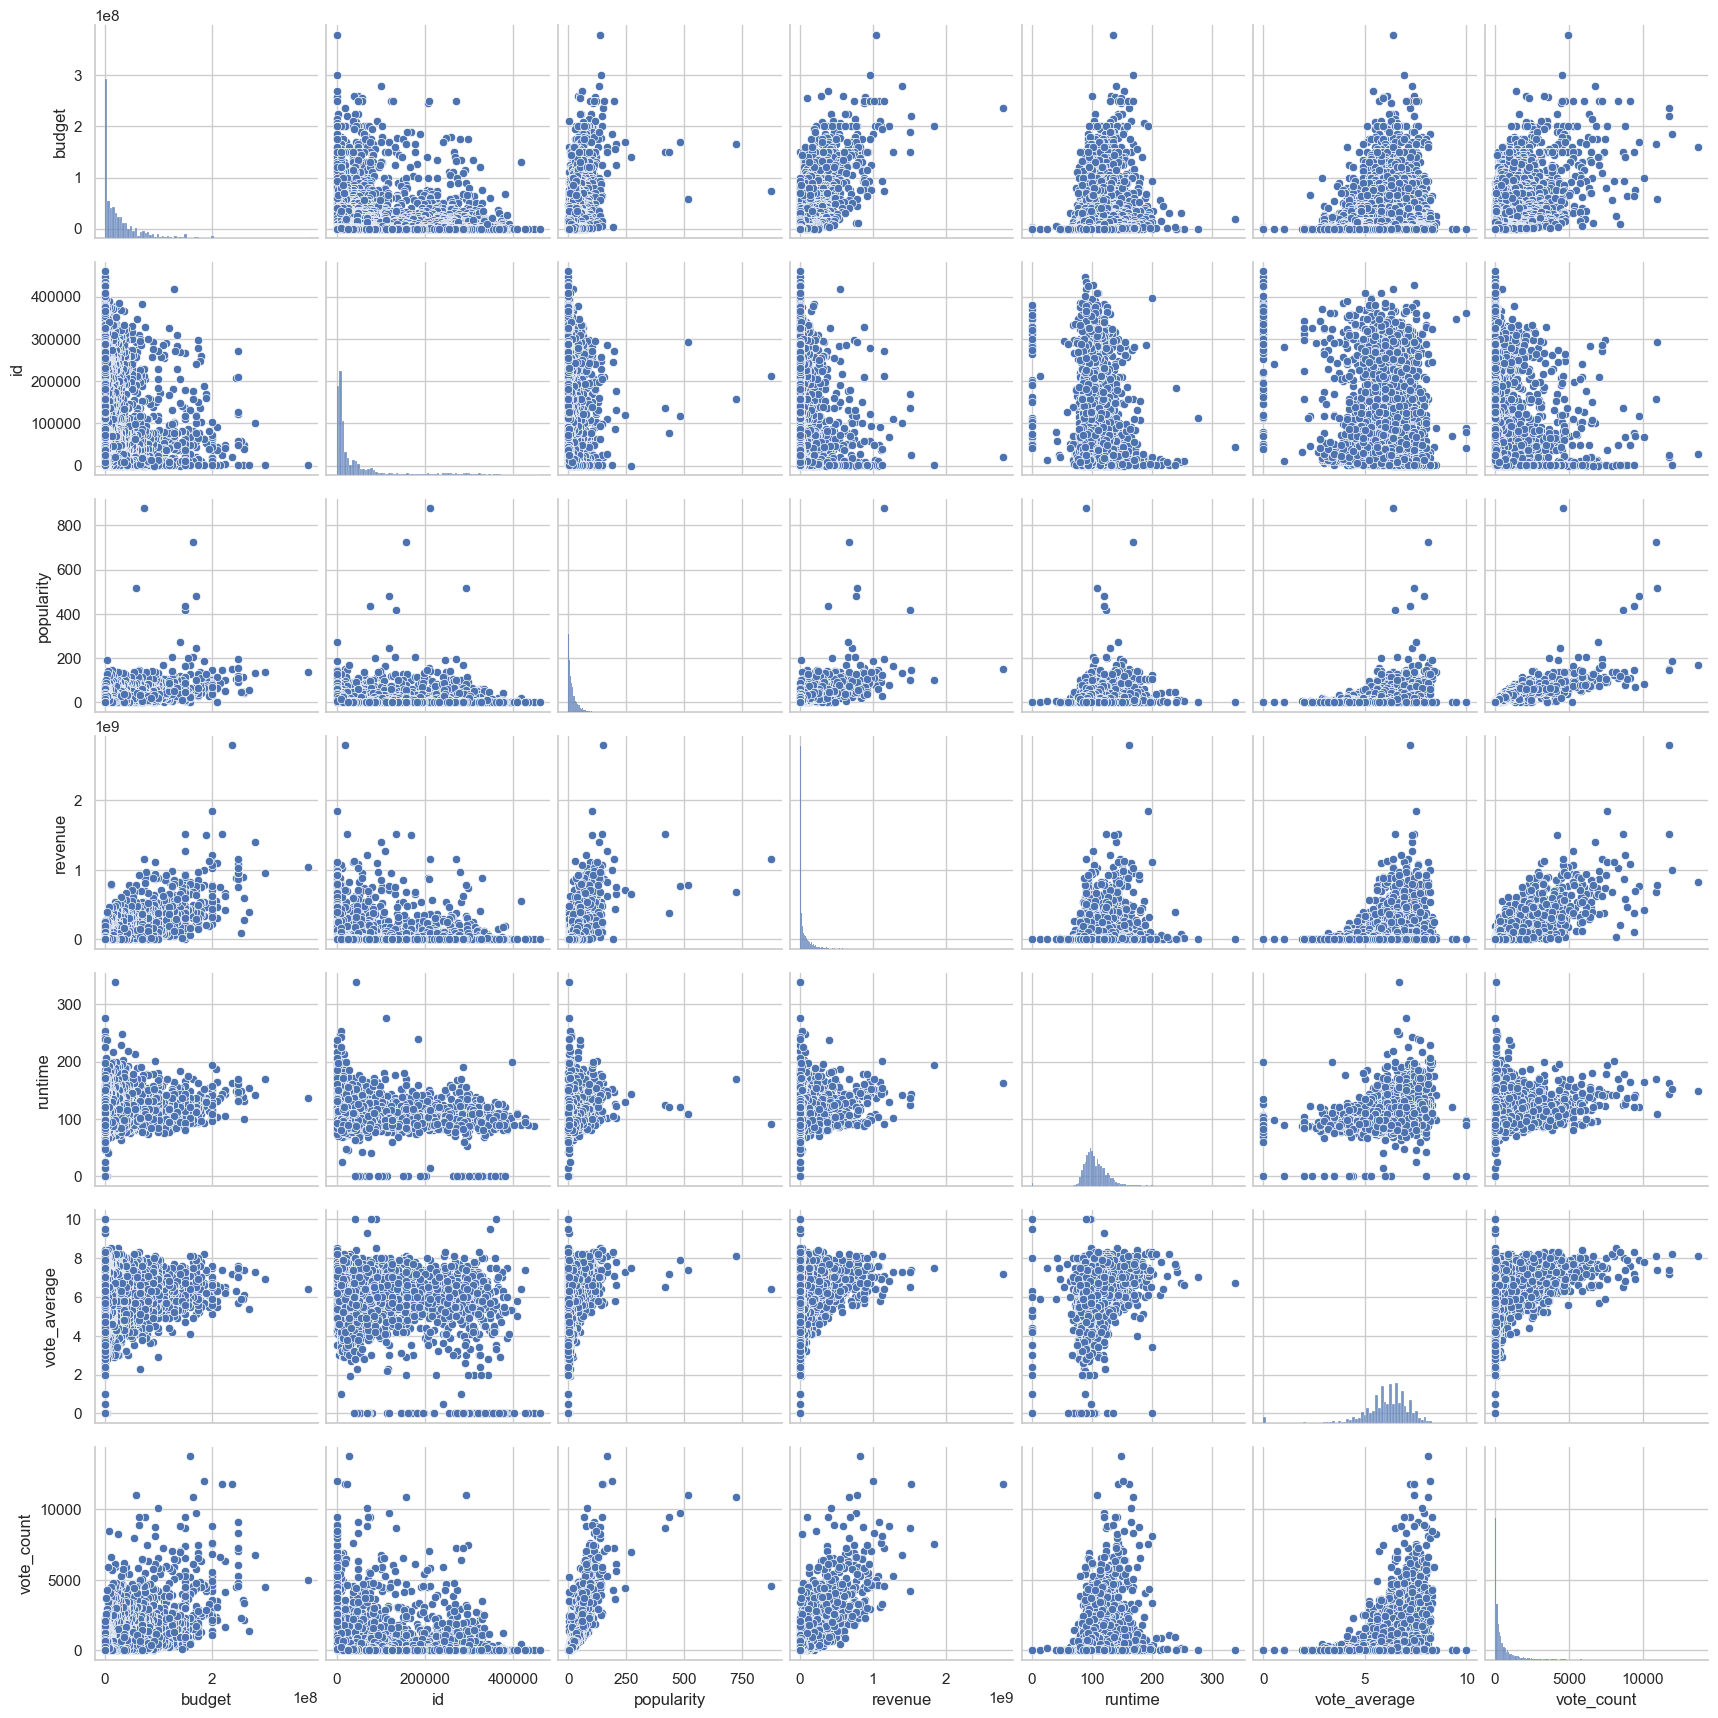

In [114]:
# Example: Relationship between two numeric columns
sns.pairplot(df)
plt.show()

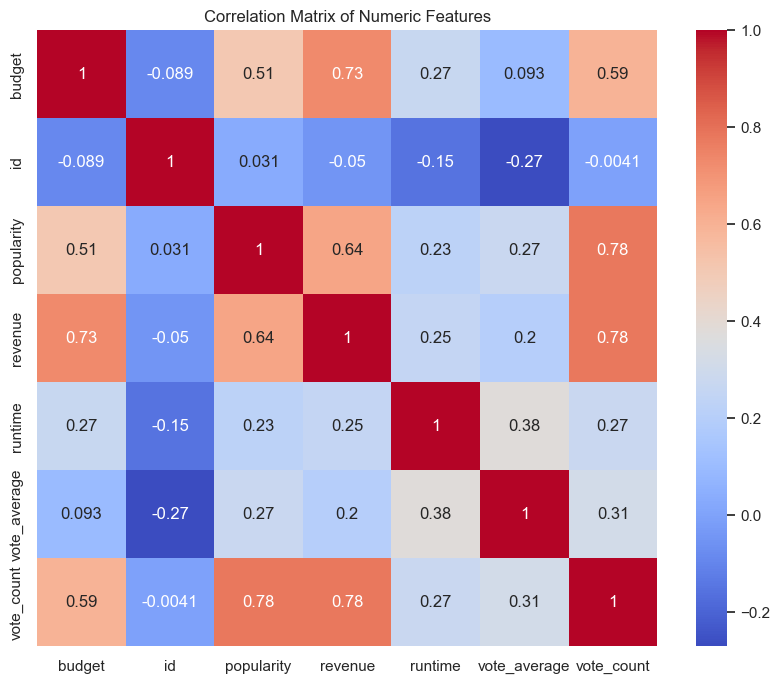

In [115]:
# Only select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

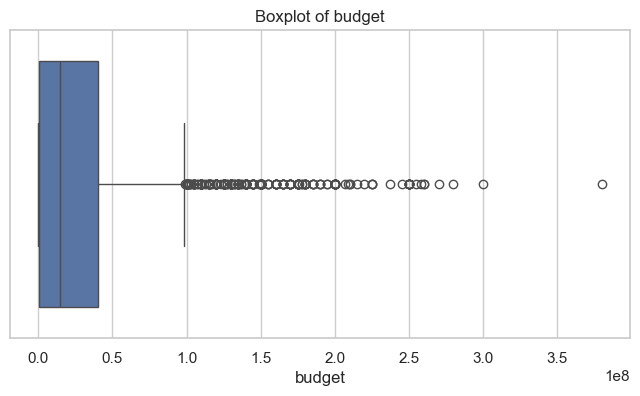

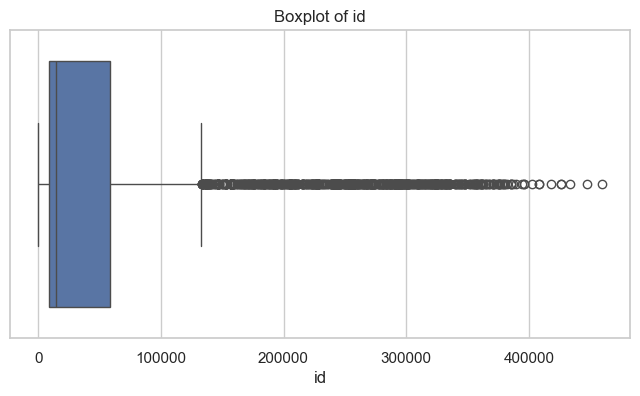

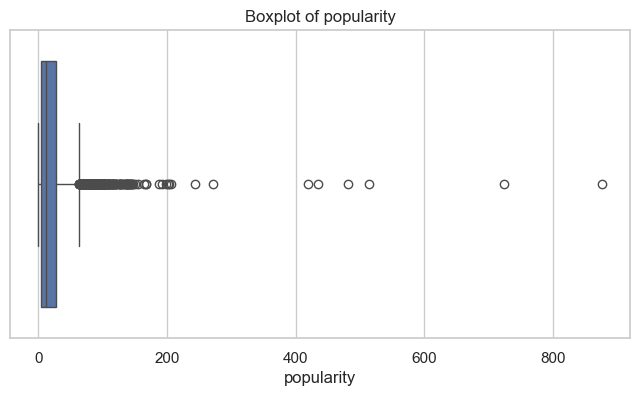

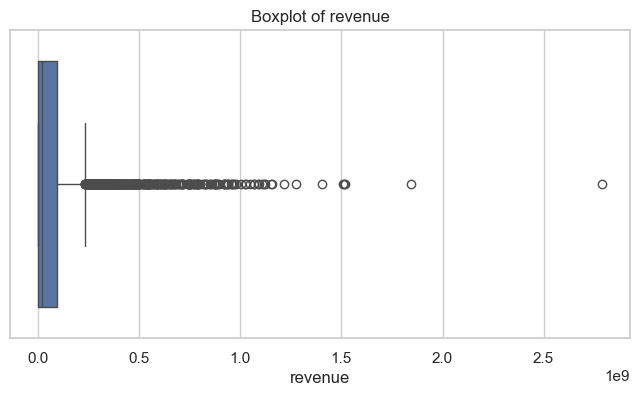

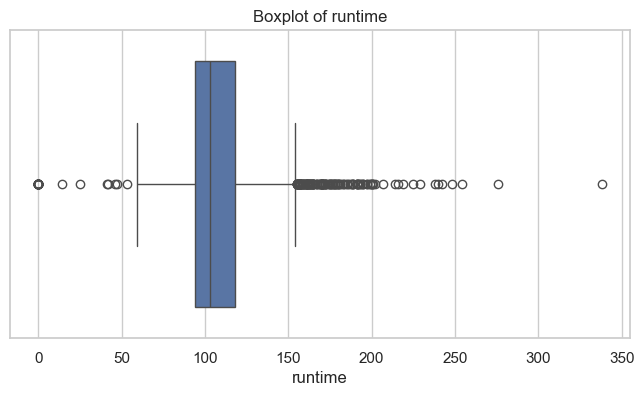

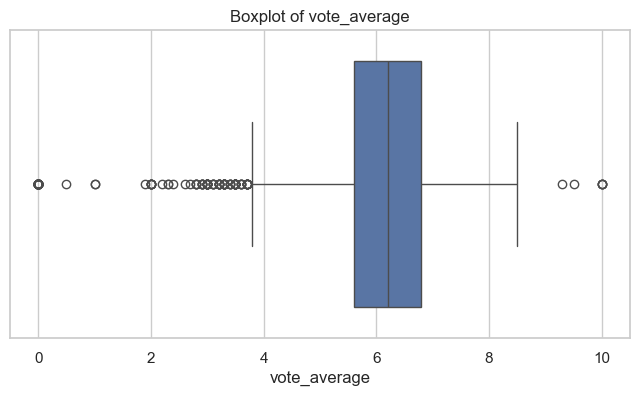

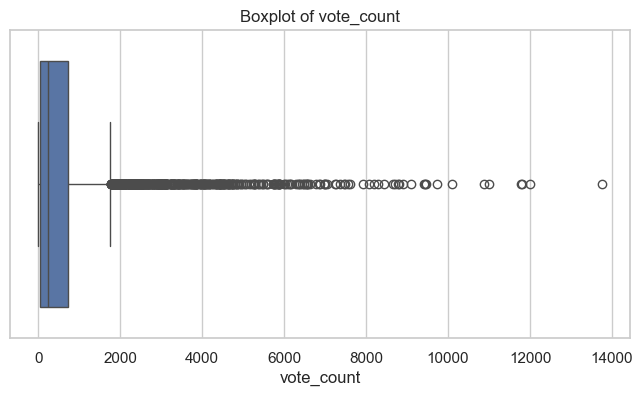

In [116]:
# Boxplots to visualize outliers
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Step 4: Data Cleaning & Feature Engineering

1. Handle Missing Values

In [117]:
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [118]:
data_new=data.drop(['homepage','tagline'],axis=1)

In [119]:
data_new.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

Feature Engineering

Create new column: Profit (revenue - budget)

In [120]:
data_new['profit'] = data_new['revenue'] - data_new['budget']


In [121]:
data_new.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,635674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,24139100


Calculate Return on Investment (ROI)

In [122]:
# Avoid division by zero
data_new['ROI'] = df.apply(lambda x: (x['revenue'] - x['budget']) / x['budget']*100 if x['budget'] > 0 else 0, axis=1)


In [123]:
data_new.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,profit,ROI
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2550965087,1076.356577
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000,220.333333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,635674609,259.459024
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,834939099,333.975640
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,24139100,9.284269


Step 5: Visualizations Based on Cleaned Data

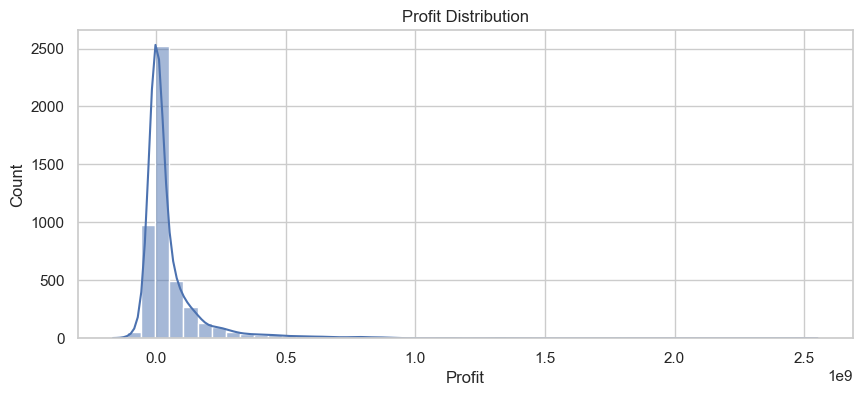

In [124]:
#Distribution of Profit
plt.figure(figsize=(10,4))
sns.histplot(data_new['profit'],bins=50,kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

In [125]:
import ast

# Function to extract the first genre name from the JSON-like string
def extract_first_genre(genre_str):
    try:
        genre_list = ast.literal_eval(genre_str)
        if isinstance(genre_list, list) and genre_list:
            return genre_list[0]['name']
        else:
            return None
    except (ValueError, SyntaxError):
        return None

# Apply the function to the 'genres' column
data_new['genre'] = data_new['genres'].apply(extract_first_genre)


In [126]:
data_new['genres'].head(1)


0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [127]:
# Filter profitable movies
profitable_movies = data_new[data_new['profit'] > 0]

# Count profitable movies per genre
genre_profit_counts = profitable_movies['genre'].value_counts()

# Display result
print(genre_profit_counts)

genre
Drama              567
Comedy             525
Action             444
Adventure          234
Horror             182
Crime              108
Thriller            93
Fantasy             83
Animation           83
Science Fiction     67
Romance             60
Family              31
Documentary         27
Mystery             21
Western             20
History             15
Music               15
War                 10
Name: count, dtype: int64


C:\Users\Yashraj Sharma\AppData\Local\Temp\ipykernel_22496\1118853773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_profit_counts.index,y=genre_profit_counts.values, palette="viridis",legend=False)


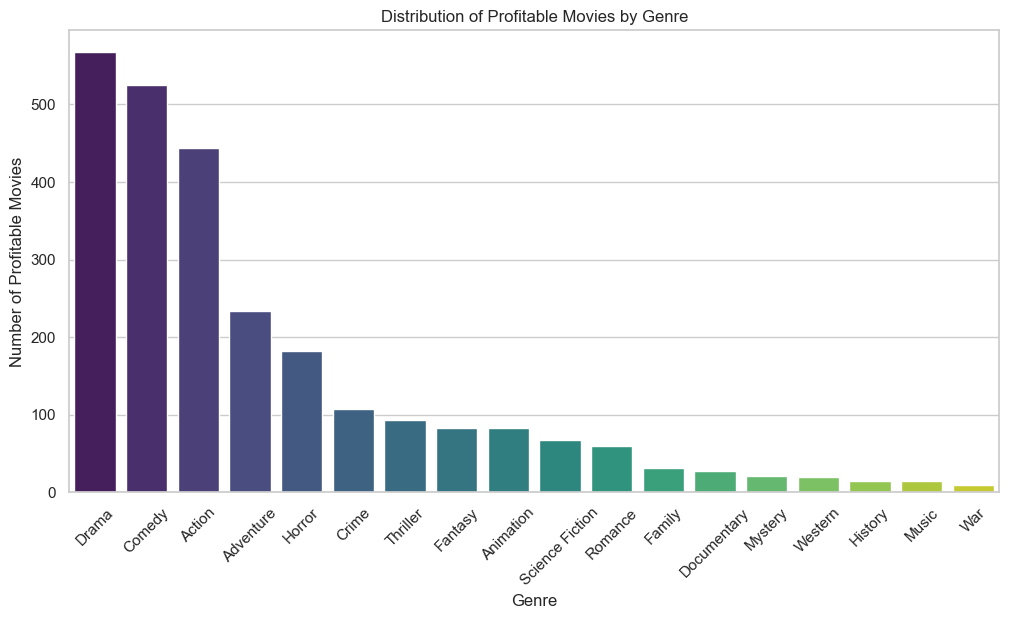

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of profitable movies by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_profit_counts.index,y=genre_profit_counts.values, palette="viridis",legend=False)
plt.title("Distribution of Profitable Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Profitable Movies")
plt.xticks(rotation=45)
plt.show()


In [129]:
#checking the profitable movie according to release date:

# Convert 'release_date' to datetime
data_new['release_date'] = pd.to_datetime(data_new['release_date'], errors='coerce')

# Create a 'release_quarter' column
data_new['release_quarter'] = data_new['release_date'].dt.quarter

# Create 'profit' column if not already present
data_new['profit'] = data_new['revenue'] - data_new['budget']

# Filter profitable movies
df_profitable = data_new[data_new['profit'] > 0]

# Count number of profitable movies per quarter
profit_by_quarter = df_profitable['release_quarter'].value_counts().sort_index()

# Display result
print(profit_by_quarter)


release_quarter
1.0    507
2.0    636
3.0    728
4.0    714
Name: count, dtype: int64


Summary of Profitable Movie Analysis:
Profitability Overview

After calculating the profit (revenue - budget) for each movie, it was observed that only a small fraction of movies actually made a profit.

This suggests that most movies do not recover their production costs, highlighting the high-risk nature of the film industry.

Top Performing Genres

Among the movies that did make a profit, the genres that contributed the most were:

 Drama

 Comedy

 Action

These genres consistently appeared at the top when counting profitable films, indicating their stronger potential for financial success.

Genre-Wise Insight

While genres like Adventure, Science Fiction, and Fantasy often have high budgets, they do not guarantee profit.

Simpler genre films like Drama and Comedy may be more profitable due to lower production costs and broader audience appeal.

Business Implication

Investing in Drama, Comedy, and Action genres might increase the likelihood of profit.

However, due diligence is needed since only a small percentage of movies are profitable overall, regardless of genre.

Step 6:Hypotheses for Movie Profitability Analysis

Genre vs Profitability Hypothesis
Hypothesis:

1."Movies in the Drama, Comedy, and Action genres are more likely to be profitable than movies in other genres."
Rationale: EDA revealed that these genres consistently had more profitable films.
Test Approach: Compare the proportion of profitable films across genres using a chi-square test or proportions analysis.


2."Movies with lower budgets are more likely to make a profit compared to high-budget movies."
Rationale: High-budget films do not always guarantee returns, while low-budget films can become sleeper hits.
Test Approach: Segment movies into low, medium, and high budget tiers and analyze the profit ratio in each.

3."Movies released in the summer or holiday seasons are more likely to be profitable."
Rationale: Blockbuster windows (last two quaters of year) often align with major profitable releases.
Test Approach: Extract release months and test if seasonal windows correspond to higher profit margins.



step 7: Discussion about one hypothesis:

Test Approach
Step 1:  Make a Profit Column (e.g., if revenue > budget).

Step 2: Group movies by genre.

Step 3: Calculate the proportion of profitable movies in each genre.

Step 4: Create two groups:

Group A: Movies in Drama, Comedy, or Action genres.

Group B: Movies in all other genres.

Step 5: Use a chi-square test of independence or a z-test for two proportions to compare the proportion of profitable movies between Group A and Group B.

In [130]:
# Create a binary column: 1 if profitable, 0 if not
data_new['profitability'] = data_new['profit'].apply(lambda x: 1 if x > 0 else 0)


In [131]:
profitable_movies = data_new[data_new['profitability'] == 1].shape[0]
print(profitable_movies)


2585


In [132]:
def assign_group(genre_str):
    if pd.isnull(genre_str):
        return 'B'
    if any(g in genre_str for g in ['Drama', 'Comedy', 'Action']):
        return 'A'
    else:
        return 'B'

data_new['group'] = data_new['genre'].apply(assign_group)


In [133]:
data_new.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,profit,ROI,genre,release_quarter,profitability,group
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,2550965087,1076.356577,Action,4.0,1,A
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000,220.333333,Adventure,2.0,1,B
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,635674609,259.459024,Action,4.0,1,A
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,834939099,333.975640,Action,3.0,1,A
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,24139100,9.284269,Action,1.0,1,A


In [134]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Example: Assuming you already have a dataframe `df` with columns 'group' and 'profitability'
# Group A = Drama, Comedy, Action
# Group B = All other genres

# Step 1: Create the contingency table
contingency_table = pd.crosstab(data_new['group'], data_new['profitability'])
print("Contingency Table:\n", contingency_table)

# Step 2: Chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"p-value = {p_chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print("Expected Frequencies:\n", expected)

# Step 3: Z-test for proportions
# Get counts of profitable movies in each group
success_counts = np.array([contingency_table.loc['A', 1], contingency_table.loc['B', 1]])
total_counts = np.array([contingency_table.loc['A'].sum(), contingency_table.loc['B'].sum()])

z_stat, p_z = proportions_ztest(success_counts, total_counts)

print("\nZ-Test for Proportions:")
print(f"Z-statistic = {z_stat:.4f}")
print(f"p-value = {p_z:.4f}")


Contingency Table:
 profitability     0     1
group                    
A              1467  1536
B               751  1049

Chi-Square Test:
Chi2 Statistic = 22.7267
p-value = 0.0000
Degrees of Freedom = 1
Expected Frequencies:
 [[1386.76951905 1616.23048095]
 [ 831.23048095  968.76951905]]

Z-Test for Proportions:
Z-statistic = -4.7972
p-value = 0.0000


data strongly supports the hypothesis that movies in Drama, Comedy, and Action genres (Group A) are more likely to be profitable than movies in other genres (Group B).

